In [1]:
import numpy as np 
import pandas as pd 

from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objects as go

import cufflinks as cf
cf.go_offline()
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        pass
        #print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.
from IPython.display import display, Image


import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point,Polygon

import math

# Human Trafficking

***Trafficking in persons is a serious crime and a grave violation of human rights. Every year, thousands of men, women and children fall into the hands of traffickers, in their own countries and abroad. Almost every country in the world is affected by trafficking, whether as a country of origin, transit or destination for victims. ***



*The definition of trafficking consists of three core elements:*

1. The **action** of trafficking which means the recruitment, transportation, transfer, harboring or receipt of persons

2. The **means** of trafficking which includes threat of or use of force, deception, coercion, abuse of power or position of vulnerability

3. The **purpose** of trafficking which is always exploitation. In the words of the Trafficking Protocol, article 3 "exploitation shall include, at a minimum, the exploitation of the prostitution of others or other forms of sexual exploitation, forced labor or services, slavery or practices similar to slavery, servitude or the removal of organs


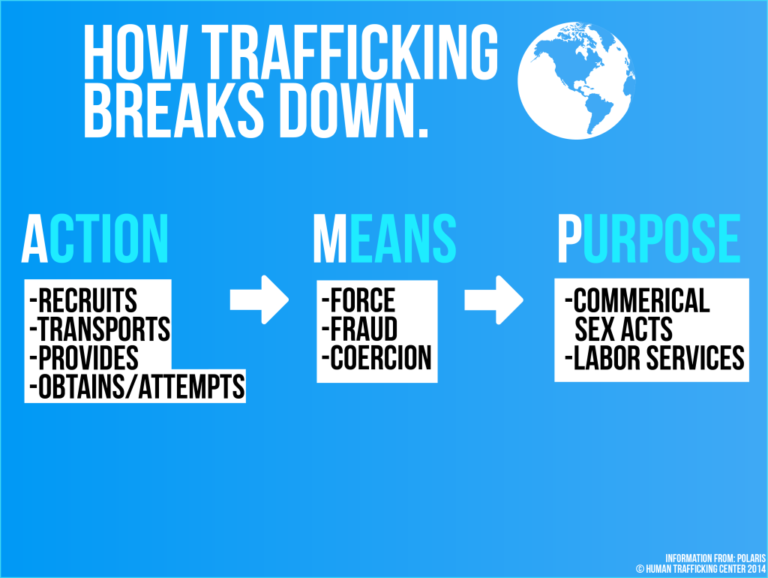

In [2]:
display(Image(filename='/kaggle/input/modern-slvery-final/modern_slavery_final/trafficking_breaksdown.png'))

# Facts

* At any given time in 2016, an estimated 40.3 million people are in modern slavery, including 24.9 million in forced labour and 15.4 million in forced marriage.

* It means there are 5.4 victims of modern slavery for every 1,000 people in the world.
 
* 1 in 4 victims of modern slavery are children.
 
* Out of the 24.9 million people trapped in forced labour, 16 million people are exploited in the private sector such as domestic work, construction or agriculture; 4.8 million persons in forced sexual exploitation, and 4 million persons in forced labour imposed by state authorities.
     
* Women and girls are disproportionately affected by forced labour, accounting for 99% of victims in the commercial sex industry, and 58% in other sectors


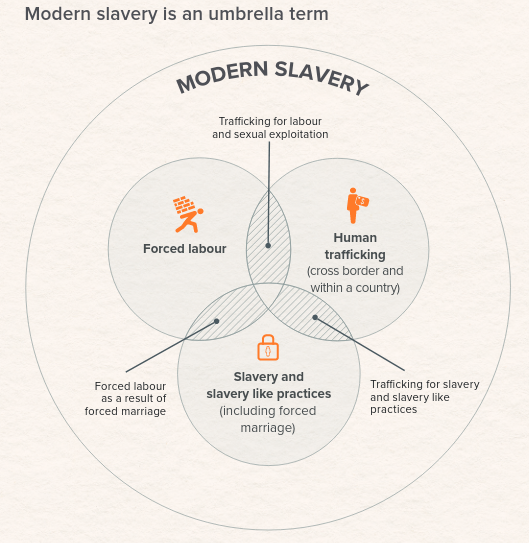

In [3]:
display(Image(filename="/kaggle/input/modern-slvery-final/modern_slavery_final/Modern_Slavery.png"))

# World Labour Data

In [4]:
labour_region = pd.read_csv("/kaggle/input/world-labour-datasets/world_labour_dataset/Number and prevalence of persons in modern slavery by region.csv")
labour_region_reserve = labour_region['Region(all_no_in_thousands)']
labour_region = labour_region[labour_region.select_dtypes(include=['number']).columns] *1000
labour_region['Region(all_no_in_thousands)'] = labour_region_reserve
labour_regions = labour_region[labour_region['Region(all_no_in_thousands)'] != 'World']
labour_region_world = labour_region[labour_region['Region(all_no_in_thousands)'] == 'World']


from plotly.subplots import make_subplots

labels = labour_regions['Region(all_no_in_thousands)'].tolist()

values1 = labour_regions['Modern Slavery'].tolist()
values2 = labour_regions['Forced Marriage'].tolist()
values3 = labour_regions['Total Forced Labor'].tolist()

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=3, specs=[[{'type':'domain'}, {'type':'domain'},{'type':'domain'}]])

fig.add_trace(go.Pie(labels=labels, values=values1, name="Modern Slavery"),
              1, 1)
fig.add_trace(go.Pie(labels=labels, values=values2, name="Forced Marriage"),
              1, 2)
fig.add_trace(go.Pie(labels=labels, values=values3, name="Total Forced Labor"),
              1, 3)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    autosize=True,
    width=1500,
    title_text="Number and prevalence of persons in slavery by region",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Modern Slavery', x=0.11, y=0.5, font_size=13, showarrow=False),
                 dict(text='Forced Marriage', x=0.5, y=0.5, font_size=13, showarrow=False),
                dict(text='Total Forced Labor', x=0.9, y=0.5, font_size=13, showarrow=False)])
fig.show()

* By seeing the charts it is clear that the problem of Slavery is most in Asia and Africa
* Arab states has the least Slavery.

In [5]:
laour_sex_age = pd.read_csv('/kaggle/input/world-labour-datasets/world_labour_dataset/Number and prevalence of persons in modern slavery by sex.csv')
labour_sex_reserve = laour_sex_age['Category_Sex_Age(ALL_NO_THOUSAND']
laour_sex_age = laour_sex_age[laour_sex_age.select_dtypes(include=['number']).columns] *1000
laour_sex_age['Category_Sex_Age'] = labour_sex_reserve


laour_sex_age_world = laour_sex_age[laour_sex_age['Category_Sex_Age'] == 'World']
laour_sex_age_world.iplot(x='Category_Sex_Age', y = ['Forced labour exploitation','Forced sexual  exploitation of adults and commercial sexual exploitation of children','State-imposed forced labour ', 'Total  forcedlabour', 'Forcedmarriage','Modernslavery'], xTitle='World',yTitle='No of peoples',kind='bar',title='Number and prevalence of persons in modern slavery in World',sort='ascending')

In [6]:
laour_sex_age_world_transpose = (laour_sex_age_world.T).reset_index()
laour_sex_age_world_transpose = laour_sex_age_world_transpose.rename(columns={'index':'Act',0:'Values'})
laour_sex_age_world_transpose = laour_sex_age_world_transpose[laour_sex_age_world_transpose['Act'] != 'Category_Sex_Age']
laour_sex_age_world_transpose = laour_sex_age_world_transpose.sort_values('Values')

labels = laour_sex_age_world_transpose['Act'].tolist()
values = laour_sex_age_world_transpose['Values'].tolist()


layout = go.Layout(
    autosize=True,
    width=1000,
    title = 'Different Types of Slavery',
    xaxis= go.layout.XAxis(linecolor = 'black',
                          linewidth = 1,
                          mirror = True),

    yaxis= go.layout.YAxis(linecolor = 'black',
                          linewidth = 1,
                          mirror = True),
)
fig = go.Figure(data=[go.Pie(labels = labels, values=values, hole=0.3)])
fig.update(layout=layout)
fig.show()

* Most people are affected by Modern Slavery
* State-imposed forced labour has the least affect
    * Reasons:
    1. Allmost no women are engage in State-imposed forced labour
    1. Women are more affected by Slavery
        

In [7]:
laour_sex_age_noworld = laour_sex_age[laour_sex_age['Category_Sex_Age'] != 'World']

laour_sex_age_noworld_transpose = laour_sex_age_noworld.T

laour_sex_age_noworld_transpose = (laour_sex_age_noworld_transpose).reset_index()
laour_sex_age_noworld_transpose = laour_sex_age_noworld_transpose.rename(columns={'index':'Act',1:'Male',2:'Female',3:'Adults',4:'Children'})
laour_sex_age_noworld_transpose = laour_sex_age_noworld_transpose[laour_sex_age_noworld_transpose['Act'] != 'Category_Sex_Age']

laour_sex_age_noworld_transpose.iplot(x='Act', y=['Male', 'Female'], kind='bar',xTitle='Different Acts of Slavery',yTitle='No of peoples',title='Number and prevalence of persons in modern slavery in World')

In [8]:
sex = ['Male','Female']
age = ['Adults', 'Children']

laour_sex_age_noworld['Total'] = laour_sex_age_noworld.loc[:,laour_sex_age_noworld.columns != 'Category_Sex_Age'].sum(axis=1)

laour_sex_age_noworld_gender = laour_sex_age_noworld
laour_sex_age_noworld_age = laour_sex_age_noworld

for val in age:
    laour_sex_age_noworld_gender = laour_sex_age_noworld_gender[laour_sex_age_noworld_gender['Category_Sex_Age'] != val]

for val in sex:
    laour_sex_age_noworld_age = laour_sex_age_noworld_age[laour_sex_age_noworld_age['Category_Sex_Age'] != val]
  

labels = laour_sex_age_noworld_gender['Category_Sex_Age'].tolist()
values = laour_sex_age_noworld_gender['Total'].tolist()


layout = go.Layout(
    autosize=True,
    title = 'Number and Prevalence of persons in Forced Labor by Gender',
    xaxis= go.layout.XAxis(linecolor = 'black',
                          linewidth = 1,
                          mirror = True),

    yaxis= go.layout.YAxis(linecolor = 'black',
                          linewidth = 1,
                          mirror = True),
)
fig = go.Figure(data=[go.Pie(labels = labels, values=values, hole=0.3)])
fig.update(layout=layout)
fig.show()

* Modern Slavery has most affected
* Womens are more affected by the slavery 
* Mens are more affected in state-imposed forced Slavery 
* Female are more affected by Forced sexual  exploitation of adults and commercial sexual exploitation of children than Male

In [9]:
laour_sex_age_noworld_transpose.iplot(x='Act', y=['Adults', 'Children'], kind='bar',xTitle='Different Acts of Slavery',yTitle='No of peoples',title='Number and prevalence of persons in modern slavery in World')

In [10]:
labels = laour_sex_age_noworld_age['Category_Sex_Age'].tolist()
values = laour_sex_age_noworld_age['Total'].tolist()


layout = go.Layout(
    autosize=True,
    title = 'Number and Prevalence of persons in Forced Labor by Age',
    xaxis= go.layout.XAxis(linecolor = 'black',
                          linewidth = 1,
                          mirror = True),

    yaxis= go.layout.YAxis(linecolor = 'black',
                          linewidth = 1,
                          mirror = True),
)
fig = go.Figure(data=[go.Pie(labels = labels, values=values, hole=0.3)])
fig.update(layout=layout)
fig.show()

* Modern Slavery has most affected
* Adults are more affected by Slavery

In [11]:
global_data = pd.read_csv("/kaggle/input/modern-slvery-final/modern_slavery_final/GIS_2018_report.csv")

# Modern slavery and the race to fish

**Marine fisheries are in crisis, requiring twice the fishing effort of the 1950s to catch the same quantity of fish, and with many fleets operating beyond economic or ecological sustainability. A possible consequence of diminishing returns in this race to fish is serious labour abuses, including modern slavery, which exploit vulnerable workers to reduce costs. Here, we use the Global Slavery Index (GSI), a national-level indicator, as a proxy for modern slavery and labour abuses in fisheries. GSI estimates and fisheries governance are correlated at the national level among the major fishing countries. Furthermore, countries having documented labour abuses at sea share key features, including higher levels of subsidised distant-water fishing and poor catch reporting. **

In [12]:
global_data_fisher = global_data

global_data_fisher['value_per_fisher (US$)'] = global_data['value_per_fisher (US$)'].astype(str)

global_data_fisher = global_data_fisher.dropna()
global_data_fisher = global_data_fisher[global_data_fisher['value_per_fisher (US$)'] !='nan']

global_data_fisher['value_per_fisher (US$)'] = global_data_fisher['value_per_fisher (US$)'].apply(lambda x: x.replace(',',''))
global_data_fisher['value_per_fisher (US$)'] = global_data_fisher['value_per_fisher (US$)'].astype(int)

global_data_fisher = global_data_fisher.sort_values('value_per_fisher (US$)', ascending=True)

trace1 = [go.Choropleth(
               colorscale = 'Picnic',
               locationmode = 'country names',
               locations = global_data_fisher['GSI Country'],
               text = global_data_fisher['GSI Country'], 
               z = global_data_fisher['value_per_fisher (US$)'],
               )]

layout = dict(title = 'Value per fisher (US$)',
                  geo = dict(
                      showframe = True,
                      showocean = True,
                      showlakes = True,
                      showcoastlines = True,
                      projection = dict(
                          type = 'hammer'
        )))


projections = [ "equirectangular", "mercator", "orthographic", "natural earth","kavrayskiy7", 
               "miller", "robinson", "eckert4", "azimuthal equal area","azimuthal equidistant", 
               "conic equal area", "conic conformal", "conic equidistant", "gnomonic", "stereographic", 
               "mollweide", "hammer", "transverse mercator", "albers usa", "winkel tripel" ]

buttons = [dict(args = ['geo.projection.type', y],
           label = y, method = 'relayout') for y in projections]
annot = list([ dict( x=0.1, y=0.8, text='Projection', yanchor='bottom', 
                    xref='paper', xanchor='right', showarrow=False )])


# Update Layout Object

layout[ 'updatemenus' ] = list([ dict( x=0.1, y=0.8, buttons=buttons, yanchor='top' )])
layout[ 'annotations' ] = annot


fig = go.Figure(data = trace1, layout = layout)
iplot(fig)

In [13]:
global_data_fisher_top20 = global_data_fisher[-20:]
global_data_fisher_worst20 = global_data_fisher[:20]

global_data_fisher_top20.iplot(x='GSI Country', y=['value_per_fisher (US$)'], kind='bar', title='Top 20 Country where Fisher Earn Highest Money',xTitle='Countries', yTitle = 'Money (US$)')

In [14]:
global_data_fisher_worst20.iplot(x='GSI Country', y=['value_per_fisher (US$)'], kind='bar', title='Top 20 Country where Fisher Earn Least Money',xTitle='Countries', yTitle = 'Money (US$)')

* Demark fishers earn the most money
* Many countries with highest paid fishers are European
* Haiti, lebanon fishers earn the least money

# Measuring Vulnerability

*The Global Slavery Index Vulnerability Model is built on statistical testing and processes to identify the factors that explain or predict the prevalence of modern slavery. The 2018 Vulnerability Model provides a risk score for 167 countries based on an analysis of data covering 23 risk variables across five major dimensions.*

In [15]:
trace1 = [go.Choropleth(
               colorscale = 'Picnic',
               locationmode = 'country names',
               locations = global_data_fisher['GSI Country'],
               text = global_data_fisher['GSI Country'], 
               z = global_data_fisher['gsi_vuln'],
               )]

layout = dict(title = 'GSI Vulnerability',
                  geo = dict(
                      showframe = True,
                      showocean = True,
                      showlakes = True,
                      showcoastlines = True,
                      projection = dict(
                          type = 'hammer'
        )))


projections = [ "equirectangular", "mercator", "orthographic", "natural earth","kavrayskiy7", 
               "miller", "robinson", "eckert4", "azimuthal equal area","azimuthal equidistant", 
               "conic equal area", "conic conformal", "conic equidistant", "gnomonic", "stereographic", 
               "mollweide", "hammer", "transverse mercator", "albers usa", "winkel tripel" ]

buttons = [dict(args = ['geo.projection.type', y],
           label = y, method = 'relayout') for y in projections]
annot = list([ dict( x=0.1, y=0.8, text='Projection', yanchor='bottom', 
                    xref='paper', xanchor='right', showarrow=False )])


# Update Layout Object

layout[ 'updatemenus' ] = list([ dict( x=0.1, y=0.8, buttons=buttons, yanchor='top' )])
layout[ 'annotations' ] = annot


fig = go.Figure(data = trace1, layout = layout)
iplot(fig)

In [16]:
global_data = global_data.sort_values('gsi_vuln', ascending=False)
global_data_top20 = global_data[:20]
global_data_top20.iplot(x='GSI Country', y=['gsi_vuln'], kind='bar', title='Top 20 Having Worst Global Slavery Index Vulnerability',xTitle='Countries', yTitle = 'GSI Vunerable Score')

In [17]:
global_data_least20 = global_data[-20:]
global_data_least20.iplot(x='GSI Country', y=['gsi_vuln'], kind='bar', title='Top 20 Having Least Global Slavery Index Vulnerability',xTitle='Countries', yTitle = 'GSI Vunerable Score')

* Many European and some Asian countries have less GSI Vunerability
* Many African and some Asian(mostly western Asia) countries have high GSI Vunerability 

# Nepal Trafficking Data Analysis

**Asar Data was not present, So taking the mean value**

In [18]:
nepal_crime_month = pd.read_csv('/kaggle/input/cid-nepal-2076-final/CID_CSV_final/Number of trafficking cases registered in Nepal Police by Nepali months, FY 2018_19.csv')

nepal_crime_month = nepal_crime_month.fillna(nepal_crime_month.mean())
nepal_crime_month['Trafficking Cases']  = nepal_crime_month['Trafficking Cases'].astype(int)

nepal_crime_month.iplot(x='Months', y=['Trafficking Cases'], kind='scatter',xTitle='Months',yTitle='Trafficking Cases',title='Number of trafficking cases registered in Nepal Police by Nepali months, FY 2018_19')

* Most Trafficking happens in Jestha
* Least Trafficking happens in Kartik

In [19]:
import plotly.express as px 

#nepal_crime_month
fig = px.box(nepal_crime_month, y='Trafficking Cases', title='Trafficking Case (2076 BS)')
fig.show()

* Maximum number of trafficking happened in a month is 50
* Minimum number of trafficking happened in a month is 10

In [20]:
trafficking_case_state = pd.read_csv('/kaggle/input/cid-nepal-2076-final/CID_CSV_final/Number of Trafficking cases in Nepal by state.csv')

trafficking_case_state_total = trafficking_case_state[trafficking_case_state['State'] == 'Total']
trafficking_case_state_nototal = trafficking_case_state[trafficking_case_state['State'] != 'Total']

trafficking_case_state_nototal.iplot(x='State', y=['No of Cases(2074/75)', 'No of Cases(75/76)'], kind='bar',xTitle='Province',yTitle='Trafficking Cases',title='Number of Trafficking cases in Nepal by state')

* State 5 has the highest trafficking in 2074/75 BS
* State 1 has the highest trafficking in 2075/76 BS
* State 4(Gandaki) and State 6(Karnali) has the least trafficking in both years
* Compared to 2074/75 BS, 2075/76 BS has less trafficking except State 6(karnali) and State 7
* State 6(Karnali) trafficking cases increases while remains same for State 7

In [21]:
trafficking_case_state_total.iplot(x='State', y=['No of Cases(2074/75)', 'No of Cases(75/76)'], kind='bar',xTitle='Nepal',yTitle='Trafficking Cases',title='Number of Trafficking cases in Nepal')

**Trafficking Cases decreases in 2075/76 BS compared to 2074/2075 BS**

In [22]:
trafficking_distribution = pd.read_csv('/kaggle/input/cid-nepal-2076-final/CID_CSV_final/Distribution of number of trafficking cases by modus operandi of trafficking, Nepal.csv')
trafficking_distribution_nototal = trafficking_distribution[trafficking_distribution['Modus Operandi'] != 'Total']

from plotly.subplots import make_subplots
labels = trafficking_distribution_nototal['Modus Operandi'].tolist()

values1 = trafficking_distribution_nototal['FY2016/17 No'].tolist()
values2 = trafficking_distribution_nototal['FY 2017/18 No'].tolist()
values3 = trafficking_distribution_nototal['FY 2018/19 No'].tolist()

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=3, specs=[[{'type':'domain'}, {'type':'domain'},{'type':'domain'}]])

fig.add_trace(go.Pie(labels=labels, values=values1, name="Nepal(2016/17)"),
              1, 1)
fig.add_trace(go.Pie(labels=labels, values=values2, name="Nepal(2017/18)"),
              1, 2)
fig.add_trace(go.Pie(labels=labels, values=values3, name="Nepal(2018/19)"),
              1, 3)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(    
    autosize=True,
    width=1500,
    title_text="Distribution of number of trafficking cases by modus operandi of trafficking Nepal(2016-2018)",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='2016/17', x=0.12, y=0.5, font_size=20, showarrow=False),
                 dict(text='2017/18', x=0.5, y=0.5, font_size=20, showarrow=False),
                dict(text='2018/19', x=0.88, y=0.5, font_size=20, showarrow=False)])
fig.show()

In [23]:
trafficking_distribution_nototal.iplot(x='Modus Operandi', y=['FY2016/17 No', 'FY 2017/18 No','FY 2018/19 No'], kind='bar',xTitle='Modus Operandi',yTitle='Years',title='Distribution of number of trafficking cases by modus operandi of trafficking, Nepal')

* In 2016/2017 AD Tour/travel used to be main cause of Trafficking
* Compared to 2017/2018 AD Lure/Deception has decreased but it remains the main cause of trafficking
* All causes of trafficking has lowered in 2018/2019 AD 
* There is huge increase in  trafficking in 2017/18 AD compared to 2016/2017 AD

# Visualizing Trafficking in Nepal By Map

In [24]:
nepal_district_cases = pd.read_csv('/kaggle/input/cid-nepal-2076-final/CID_CSV_final/Number of trafficking cases registered by districts_(2018-19).csv')
nepal_district_cases_map = nepal_district_cases.reindex(nepal_district_cases['Number of Cases'])

#Preproceesing Data for Choropleth maps
districts_full = gpd.read_file('/kaggle/input/nepal-data-location/NPL_adm3.shx')
districts_full_geometry = districts_full[['NAME_3', 'geometry']]


nepal_district_cases_map['Districts'] = nepal_district_cases_map['Districts'].replace({"W.Nawalparasi": "Nawalparasi","E.Nawalparasi": "Nawalparasi", "RukumPurba":"Rukum" ,"RukumPaschim":"Rukum"})

plot_dict = nepal_district_cases_map.Districts.value_counts()



districts_full_geometry_dict = dict()
for key,value in zip(districts_full_geometry['NAME_3'],districts_full_geometry['geometry']):
    districts_full_geometry_dict[key] = value


def return_coordinates(x):
    return districts_full_geometry_dict[x]

nepal_district_cases_map['geometry'] = nepal_district_cases_map['Districts'].apply(lambda x: return_coordinates(x))



geometry = nepal_district_cases_map['geometry']
df = nepal_district_cases_map.drop(['Longitude', 'Latitude','Number of Cases'], axis=1)
crs = {'init': 'epsg:4326'}
nepal_district_cases_map_gdf = GeoDataFrame(nepal_district_cases_map, crs=crs, geometry=geometry)




nepal_districtonly_cases_map = nepal_district_cases_map_gdf[['Districts','geometry']].set_index('Districts')

# Create a base map
m_6 = folium.Map(location=[28.3949,84.1240], tiles='cartodbpositron', zoom_start=7)

# Add a choropleth map to the base map
Choropleth(geo_data=nepal_districtonly_cases_map.__geo_interface__, 
           data=plot_dict, 
           key_on="feature.id", 
           fill_color='YlGnBu', 
           legend_name='Number of trafficking cases registered by districts_(2018-19)'
          ).add_to(m_6)

# Display the map
m_6

In [25]:
# Create the map
m_3 = folium.Map(location=[28.3949,84.1240], tiles='cartodbpositron', zoom_start=7)

# Add points to the map
mc = MarkerCluster()
for idx, row in nepal_district_cases_map.iterrows():
    if not math.isnan(row['Longitude']) and not math.isnan(row['Latitude']):
        mc.add_child(Marker([row['Latitude'], row['Longitude']]))
m_3.add_child(mc)

# Display the map
m_3

